In [ ]:
import scanpy as sc
orig_adata=sc.read_h5ad('hpap_islet_scRNAseq.h5ad')

/disk/tanbowen/anaconda3/envs/knockpath/lib/python3.11/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


<Axes: title={'center': 'Cell Type'}, xlabel='UMAP1', ylabel='UMAP2'>

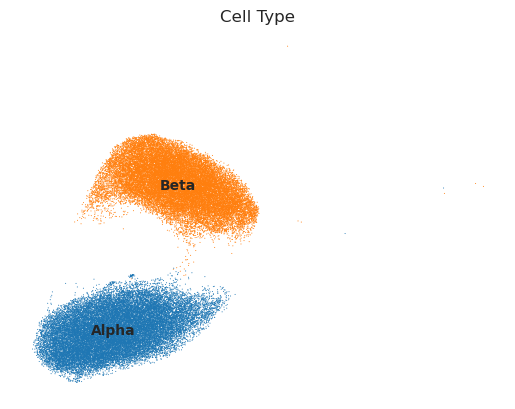

In [10]:

alpha_beta_adata=orig_adata[orig_adata.obs['Cell Type'].isin(['Alpha','Beta'])].copy()
# sc.pl.umap(alpha_beta_adata, color=['Cell Type'], frameon=False, legend_loc='on data', title=[],show=False)
AAB_alpha_beta_adata=alpha_beta_adata[alpha_beta_adata.obs['Diabetes Status'].isin(['AAB+','ND'])].copy()
sc.pl.umap(AAB_alpha_beta_adata, color=['Cell Type'], frameon=False, legend_loc='on data', title=[],show=False)

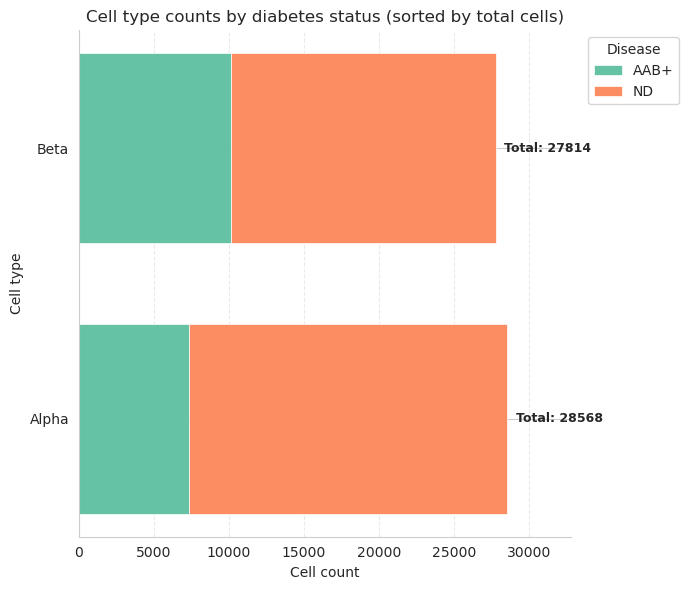

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np

adata=AAB_alpha_beta_adata
cell_type_key = 'cell_type' if 'cell_type' in adata.obs.columns else 'Cell Type'
diabetes_key = 'diabetes_status' if 'diabetes_status' in adata.obs.columns else 'Diabetes Status'

ct_disease_prop = pd.crosstab(
    adata.obs[cell_type_key],
    adata.obs[diabetes_key],
    normalize='index'
)

ct_counts = pd.crosstab(
    adata.obs[cell_type_key],
    adata.obs[diabetes_key]
)

sort_index = ct_counts.sum(axis=1).sort_values(ascending=False).index
ct_disease_prop_sorted = ct_disease_prop.loc[sort_index]
ct_counts_sorted = ct_counts.loc[sort_index]

sns.set_style("whitegrid")
colors = sns.color_palette("Set2", n_colors=ct_counts_sorted.shape[1])
y_positions = np.arange(len(ct_counts_sorted))
bar_height = 0.7
left = np.zeros(len(ct_counts_sorted))

fig, ax = plt.subplots(figsize=(7, 6))

for disease, color in zip(ct_counts_sorted.columns, colors):
    counts = ct_counts_sorted[disease].values
    bars = ax.barh(
        y_positions,
        counts,
        left=left,
        height=bar_height,
        color=color,
        edgecolor="white",
        linewidth=0.5,
        label=disease,
    )
    # for bar, count in zip(bars, counts):
    #     if count == 0:
    #         continue
    #     x = bar.get_x() + bar.get_width() / 2
    #     y = bar.get_y() + bar.get_height() / 2
    #     r, g, b, _ = bar.get_facecolor()
    #     text_color = "black" if 0.299 * r + 0.587 * g + 0.114 * b > 0.6 else "white"
    #     ax.text(x, y, f"{int(count)}", ha="center", va="center", fontsize=8, color=text_color)
    left += counts

ax.set_yticks(y_positions)
ax.set_yticklabels(ct_counts_sorted.index)
max_total = ct_counts_sorted.sum(axis=1).max()
ax.set_xlim(0, max_total * 1.15)
ax.set_xlabel("Cell count")
ax.set_ylabel("Cell type")
ax.set_title("Cell type counts by diabetes status (sorted by total cells)")
ax.legend(title="Disease", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.grid(axis="x", linestyle="--", alpha=0.4)

for y_pos, total in enumerate(ct_counts_sorted.sum(axis=1).values):
    ax.text(total * 1.02, y_pos, f"Total: {int(total)}", ha="left", va="center", fontsize=9, fontweight="bold")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("cell_type_disease_counts.pdf", bbox_inches="tight")
plt.show()


In [3]:
adata.obs['cell_type']=adata.obs['Cell Type']
del adata.obs['Cell Type']
adata.obs['diabetes_status']=adata.obs['Diabetes Status']
del adata.obs['Diabetes Status']

In [21]:
import numpy as np
# Convert log-normalized data back to raw counts and store in count layer
adata.layers['count'] = np.expm1(adata.X)

In [1]:
beta_adata = adata[adata.obs['cell_type']=='Beta']
beta_adata.obs['diabetes_status'].value_counts()

NameError: name 'adata' is not defined

In [26]:
alpha_adata = adata[adata.obs['cell_type']=='Alpha']
alpha_adata.obs['diabetes_status'].value_counts()

diabetes_status
ND      21197
T2D     13008
T1D      8635
AAB+     7371
Name: count, dtype: int64

In [ ]:

adata.write("processed_hpap.h5ad")

In [1]:
import scanpy as sc
adata=sc.read_h5ad("processed_hpap.h5ad")
adata

AnnData object with n_obs × n_vars = 192203 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Percent MT', 'Seurat Clusters', 'Library', 'Sex', 'Tissue Source', 'Chemistry', 'Cell Type Grouped', 'cell_type', 'diabetes_status'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'Cell Type_colors', 'Diabetes Status_colors', 'neighbors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
    obsp: 'distances'

/tmp/ipykernel_2151285/3993191535.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='pastel')


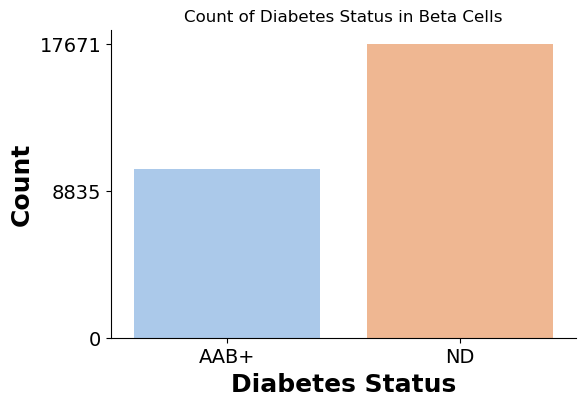

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
# Count the occurrences of each diabetes status
status_counts = beta_subset.obs['diabetes_status'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='pastel')
plt.title('Count of Diabetes Status in Beta Cells')
plt.xlabel('Diabetes Status',weight='bold', size=18)
plt.ylabel('Count',weight='bold', size=18)
plt.yticks([0,max(status_counts.values)//2,max(status_counts.values)],size=14)
plt.xticks(size=14)
sns.despine()
plt.savefig("beta_cell_diabetes_status_counts.pdf", bbox_inches="tight")
plt.show()